In [1]:
#二分类任务：只有发病不发病
#目标：根据指标建立模型，可以准确识别心脑血管疾病
#重点：数据分析与探索，优化模型
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm#进度条工具
data=pd.read_csv('C:/Users/86156/Desktop/生产实习/cardio_train.csv',
                sep=';',#设置分隔符
                index_col=0)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


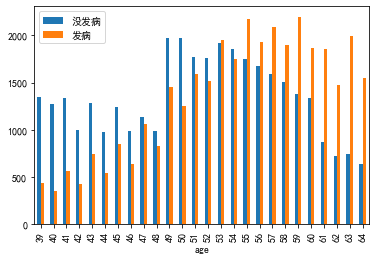

In [2]:
#特征探索
#探索标签与数据之间的关系
#年龄特征
#把天数处理成年
data['age']=data['age']/365
data['age']=data['age'].astype('int')
#round是取小数，括号里几位数字就几位小数，返回的是浮点型数
# data['age'].round(0)
#心脑血管疾病与年龄是否有关
#数据透视表观察
ans_age=pd.pivot_table(data,index='age',columns='cardio',
               values='gender',#统计个数，随便挑一列
               aggfunc='count'#统计方法
              )
#29，30人数较少，选择删除(dropna)
ans_age=ans_age.dropna(axis=0,how='any')
#数据可视化
ans_age.plot.bar()
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决汉字显示为□指定默认字体为黑体。
plt.rcParams['axes.unicode_minus'] = False  
#解决保存图像时 负号'-' 显示为□和报错的问题。
plt.legend(['没发病','发病'])

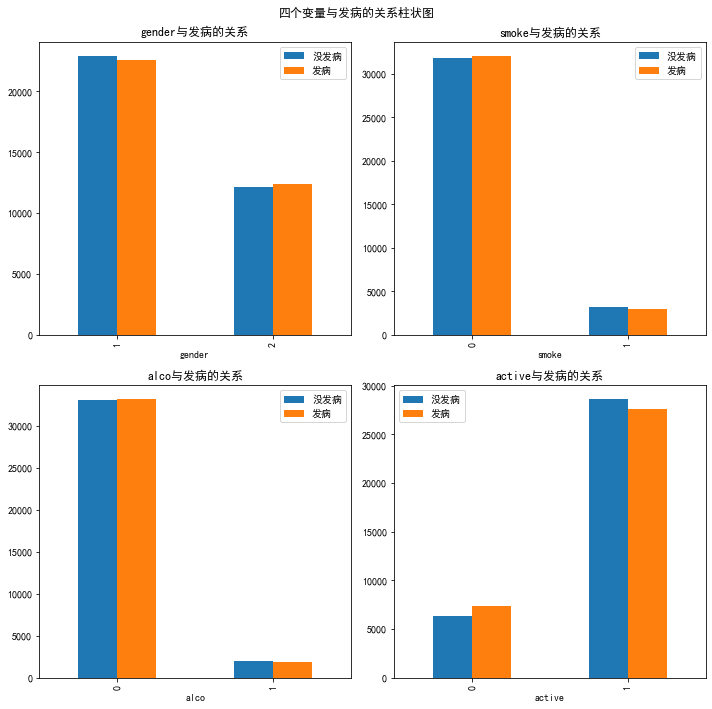

In [3]:
#同时探究四列
#性别，吸烟喝酒，运动
#参考上面方法，用for循环解决
# ['gender','smoke','alco','active'] #列表
# {'gender','smoke','alco','active'} #集合，运算：交并差
# ('gender','smoke','alco','active') #元组：作为函数的参数进行传递
# {'gender':1,'smoke':2,'alco':3,'active':4} #字典：关系映射
# array(['gender','smoke','alco','active']) #数组

#创建一个画布
fig=plt.figure(figsize=(10,10))
#创建一个列表放四个信息
list1=['gender','smoke','alco','active']
for ind,col in enumerate(list1):
    ans_=pd.pivot_table(data,index=col,columns='cardio',
               values='gluc',#统计个数，随便挑一列
               aggfunc='count'#统计方法
              )
    #指定子图
    ax_=fig.add_subplot(2,2,ind+1)
    ans_.plot.bar(ax=ax_,#指定把图划到哪个子图里
                 title=f'{col}与发病的关系',#设置一个标题
                 label='人数')
    plt.legend(['没发病','发病'])
#添加一个大标题
plt.suptitle('四个变量与发病的关系柱状图')
#调整布局
plt.tight_layout()
#将图片保存下来方便使用
plt.savefig('四个变量的关系.jpg')

65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
64.8       1
80.7       1
61.3       1
78.5       1
74.3       1
Name: weight, Length: 287, dtype: int64

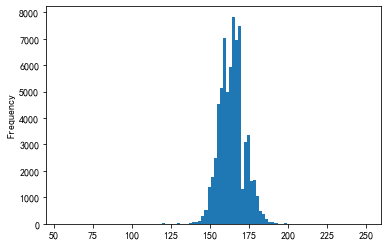

In [4]:
#身高体重
#查看数据的分布
data['height'].plot.hist(bins=100)
#查看各变量分别有多少个
data['weight'].value_counts()

Text(0, 0.5, '身高')

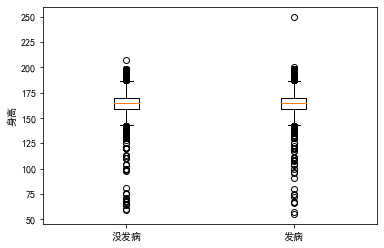

In [5]:
#种类太多，选择做箱线图
#matplotlib方法
#分别作出发病人的身高箱线图，没发病人的身高箱线图
#提取发病数据和没发病数据
h1=data.loc[data['cardio']==1,'height'].tolist()
h0=data.loc[data['cardio']==0,'height'].tolist()
#将数据转换成箱线图
plt.boxplot([h0,h1])
#修改X轴名称
plt.xticks([1,2],['没发病','发病'])
plt.ylabel('身高')

Text(0, 0.5, '体重')

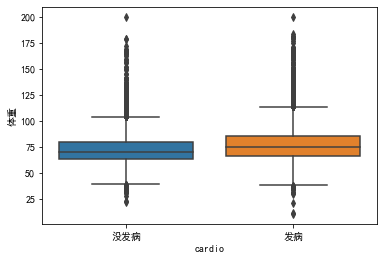

In [6]:
#适用于绘制统计图形
#方法二
#体重箱线图
sns.boxplot(data=data,x='cardio',y='weight')
plt.xticks([0,1],['没发病','发病'])
plt.ylabel('体重')

In [7]:
#其他病理性因素的相关性分析
corr_data=data.corr()['cardio'].abs().sort_values(ascending=False)[1:]
#提取特征和发病的相关系数
#从第一个往后取，第一个是发病，决定性因素，要看除自身以外的相关系数
#abs()求绝对值，目前不看正负相关，只看相关系数大小
corr_data

age            0.237985
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
active         0.035653
smoke          0.015486
height         0.010821
gender         0.008109
alco           0.007330
Name: cardio, dtype: float64

In [8]:
#模型处理
#数据集分割
#提取xy
#提取前n个为特征
n=3
#获取前三个特征并将提取数据的行索引，并将其处理成列表
feature_list=corr_data[:3].index.tolist()
#提取n个特征对应的列
x,y=data[feature_list],data['cardio']
tr_x,te_x,tr_y,te_y=train_test_split(x,y)
model=DecisionTreeClassifier().fit(tr_x,tr_y)
prey=model.predict(te_x)
accuracy_score(te_y,prey)

0.6112

In [9]:
#如何使用k折交叉验证得出结果
for train,test in KFold(n_splits=10).split(x,y):
    #pandas进行数据提取，每一次都被再次训练
    #ioc训练时数据数不匹配，因此需要指定
    #model.fit(x..iloc[train,[1,2,3]])
    #找训练数据的行索引
    tr_index=x.index[train]
    model.fit(x.loc[tr_index,feature_list],y[tr_index])
    #找到测试数据的行做因
    te_index=x.index[test]
    train_secore=model.score(x.loc[te_index,feature_list],y[te_index])
    print(np.round(train_secore,2))

0.62
0.6
0.62
0.62
0.62
0.61
0.62
0.61
0.61
0.62


In [14]:
#训练过程打包
#函数输入：模型，feature_list
#返回最终评价结果：train_secore
def model_fit(model,feature_list,data,train,test):
    y=data['cardio']
    tr_index=x.index[train]
    model.fit(data.loc[tr_index,feature_list],y[tr_index])
    te_index=x.index[test]
    train_score=model.score(data.loc[te_index,feature_list],y[te_index])
    return train_score,model    
#更换模型，批量训练
#定义一个列表，储存模型
models=[DecisionTreeClassifier(),LogisticRegressionCV(),KNeighborsClassifier()]
#定义一个列表，储存模型
for mo in models:
    #对数据进行分割，使用k折交叉验证，同时返回第几次分割和分割结果
    for i,(train,test) in enumerate(KFold(n_splits=3).split(x,y)):
        #调用定义的函数并返回所得数据
        tr_secore,model=model_fit(mo,feature_list,data,train,test)
        #输出解释使数据更清晰
        print(f'{str(model)[:-2]}模型\n第{i+1}训练结果是{tr_secore}')
    #增加间隔符
    print('*'*30)

DecisionTreeClassifier模型
第1训练结果是0.5993828747750064
DecisionTreeClassifier模型
第2训练结果是0.6049372133887627
DecisionTreeClassifier模型
第3训练结果是0.6031371876741096
******************************
LogisticRegressionCV模型
第1训练结果是0.637996057255507
LogisticRegressionCV模型
第2训练结果是0.6407662966613809
LogisticRegressionCV模型
第3训练结果是0.6405948656409377
******************************
KNeighborsClassifier模型
第1训练结果是0.5955686980371989
KNeighborsClassifier模型
第2训练结果是0.595594222774611
KNeighborsClassifier模型
第3训练结果是0.5977371105301504
******************************


In [11]:
#数据标准化
#上面的结果显示LogisticRegressionCV模型最好
#调用标准化模型
S_arr=StandardScaler().fit_transform(data)
#将标准化后的数据设置成dataframe
S_data=pd.DataFrame(S_arr,index=data.index,columns=data.columns)
S_data['cardio']=data['cardio']
for i,(train,test) in enumerate(KFold(n_splits=3).split(x,y)):
    tr_secore,model=model_fit(LogisticRegressionCV(),feature_list,S_data,train,test)
    #打印格式化结果
    print(f'{str(model)[:-2]}模型\n第{i+1}训练结果是{tr_secore}')

LogisticRegressionCV模型
第1训练结果是0.49507156938373187
LogisticRegressionCV模型
第2训练结果是0.5027214674495349
LogisticRegressionCV模型
第3训练结果是0.5013071615308791


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:08<00:00,  6.27s/it]


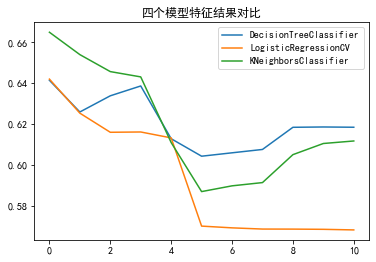

In [16]:
#特征选择：过滤法
#选择特征过程打包
#输入n （小于特征）
#返回feature_list
#提取前n个特征
def get_feature(corr_data,n=3):#n=3:默认一个参数为3
    #获取前三个特征并将提取数据的行索引，并将其处理成列表
    feature_list=corr_data[:n].index.tolist()
    return feature_list
#对不同的模型进行循环
for mo in models:
    #定义一个空间，存储不同特征对应的平均得分
    feature_train_ans=[]
    #对特征进行筛选，依次选择n个特征
    for fn in tqdm(range(1,12)):
        #根据特征的个数提取特征名称
        feature_list=get_feature(corr_data,n=fn)
        #定义一个数字，记录精确度
        ts=0
        #对数据进行k折分割
        for i,(train,test) in enumerate(KFold(n_splits=3).split(x,y)):
            #使用循环中的模型，筛选的特征，标准化后的数据进行模型训练并评估
            tr_secore,model=model_fit(mo,feature_list,S_data,train,test)
            #计算准确度之和
            ts+=tr_secore
        #将当前特征对应的准确度求平均（ts/5）或平均错误率（1-ts/5）
        #记录到特征对应的平均得分空间中
        feature_train_ans.append(1-ts/5)#1-ts/5:平均错误率
    #画出当前模型在不同特征下的平均精度/错误率
    plt.plot(feature_train_ans,label=str(mo)[:-2])
#添加标题
plt.title('四个模型特征结果对比')
plt.legend()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:24<00:00,  2.26s/it]


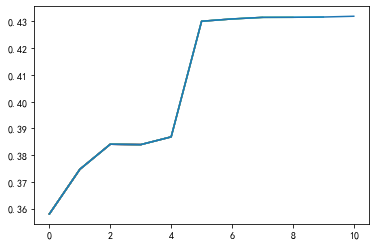

In [15]:
LR_model=LogisticRegressionCV()
feature_train_ans=[]
for fn in tqdm(range(1,12)):
    feature_list=get_feature(corr_data,n=fn)
    ts=0
    for i,(train,test) in enumerate(KFold(n_splits=3).split(x,y)):
        tr_secore,model=model_fit(LR_model,feature_list,S_data,train,test)
        ts+=tr_secore
    feature_train_ans.append(ts/5)
    plt.plot(feature_train_ans)